In [1]:
import pandas as pd

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-02 02:59:18--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K  --.-KB/s    in 0.1s    

2023-02-02 02:59:19 (1.91 MB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [2]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
matrix = df.loc[:, df.columns != "Sex"]

In [5]:
matrix.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
matrix1 = matrix - matrix.mean()

In [10]:
Cov = np.sqrt(matrix.T @ matrix) / 100
print(Cov)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          0.347433  0.306896  0.179644      0.451822        0.297742   
Diameter        0.306896  0.271301  0.158792      0.400003        0.263519   
Height          0.179644  0.158792  0.094133      0.235187        0.154748   
Whole weight    0.451822  0.400003  0.235187      0.622340        0.410445   
Shucked weight  0.297742  0.263519  0.154748      0.410445        0.272980   
Viscera weight  0.210929  0.186696  0.109785      0.290186        0.191253   
Shell weight    0.241951  0.214273  0.126117      0.331526        0.217345   
Rings           1.504732  1.330115  0.781211      1.948205        1.271576   

                Viscera weight  Shell weight     Rings  
Length                0.210929      0.241951  1.504732  
Diameter              0.186696      0.214273  1.330115  
Height                0.109785      0.126117  0.781211  
Whole weight          0.290186      0.331526  1.948205  
Shucked weig

In [11]:
eigval, eigvec = np.linalg.eig(Cov)

In [12]:
print(eigvec)

[[ 1.99400847e-01 -1.47243569e-01  6.69809856e-01  1.00193744e-01
  -6.44205889e-01 -3.27943629e-02 -2.52572937e-01 -2.19502864e-03]
 [ 1.76291759e-01 -1.36620321e-01  5.53976973e-01  1.23612203e-01
   7.63829532e-01 -2.54359322e-02 -2.07665500e-01 -2.96334320e-02]
 [ 1.03539404e-01 -8.18270513e-02  2.69703154e-01  1.76758854e-01
  -7.27394889e-03 -2.27582781e-02  9.35911935e-01  4.58087608e-02]
 [ 2.60478721e-01 -6.22686739e-01 -2.73521323e-01  3.79331444e-02
  -9.55172892e-03 -6.83527491e-01 -2.86057945e-02  6.31386501e-03]
 [ 1.70416717e-01 -4.69457727e-01  2.96973602e-03 -6.48832153e-01
   5.40666600e-03  4.48381510e-01  8.97187200e-02 -3.47060433e-01]
 [ 1.21390393e-01 -2.96408953e-01 -9.16183709e-02  2.66850261e-02
   1.28917580e-02  3.64416550e-01 -5.14847698e-02  8.67573506e-01]
 [ 1.40390818e-01 -2.73735465e-01 -2.50715928e-01  7.17773197e-01
  -3.49753954e-02  4.43409559e-01 -7.50409818e-02 -3.51903411e-01]
 [ 8.87188750e-01  4.26661281e-01 -1.60154122e-01 -7.14493282e-02
  -

In [15]:
eigval

array([8.55044574e+00, 1.06267118e-01, 1.12032030e-02, 2.36563066e-03,
       1.05966003e-04, 3.27628895e-04, 9.87982913e-04, 1.40246899e-03])

(array([  1.,   1.,   0.,   9.,  11.,  44.,  50., 147., 199., 379., 396.,
        519., 434., 342., 316., 210., 168., 145., 107., 102.,  86.,  79.,
         60.,  58.,  54.,  34.,  41.,  21.,  36.,  18.,  17.,   9.,  17.,
         19.,  14.,   8.,   3.,   3.,   2.,   3.,   6.,   0.,   4.,   2.,
          0.,   0.,   0.,   1.,   1.,   1.]),
 array([ 0.40501199,  0.60677209,  0.8085322 ,  1.0102923 ,  1.2120524 ,
         1.41381251,  1.61557261,  1.81733272,  2.01909282,  2.22085293,
         2.42261303,  2.62437314,  2.82613324,  3.02789335,  3.22965345,
         3.43141356,  3.63317366,  3.83493377,  4.03669387,  4.23845398,
         4.44021408,  4.64197419,  4.84373429,  5.04549439,  5.2472545 ,
         5.4490146 ,  5.65077471,  5.85253481,  6.05429492,  6.25605502,
         6.45781513,  6.65957523,  6.86133534,  7.06309544,  7.26485555,
         7.46661565,  7.66837576,  7.87013586,  8.07189597,  8.27365607,
         8.47541617,  8.67717628,  8.87893638,  9.08069649,  9.28245659,
 

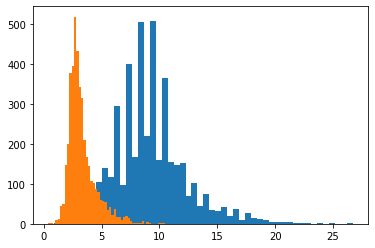

In [14]:
xpoint = matrix.dot(eigvec.T[0])
ypoint = matrix.dot(eigvec.T[1])

plt.hist(xpoint, bins=50)
plt.hist(ypoint, bins=50)

In [17]:
Cov = np.sqrt(matrix.T @ matrix) / 100
print(Cov)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          0.347433  0.306896  0.179644      0.451822        0.297742   
Diameter        0.306896  0.271301  0.158792      0.400003        0.263519   
Height          0.179644  0.158792  0.094133      0.235187        0.154748   
Whole weight    0.451822  0.400003  0.235187      0.622340        0.410445   
Shucked weight  0.297742  0.263519  0.154748      0.410445        0.272980   
Viscera weight  0.210929  0.186696  0.109785      0.290186        0.191253   
Shell weight    0.241951  0.214273  0.126117      0.331526        0.217345   
Rings           1.504732  1.330115  0.781211      1.948205        1.271576   

                Viscera weight  Shell weight     Rings  
Length                0.210929      0.241951  1.504732  
Diameter              0.186696      0.214273  1.330115  
Height                0.109785      0.126117  0.781211  
Whole weight          0.290186      0.331526  1.948205  
Shucked weig

In [43]:
cov1 = np.cov(matrix1.T)
print(cov1)
cov2 = np.sqrt(matrix1.T @ matrix1) / 10
print(cov2)

[[1.44223076e-02 1.17608250e-02 4.15691189e-03 5.44907081e-02
  2.39349454e-02 1.18872298e-02 1.50071720e-02 2.15561736e-01]
 [1.17608250e-02 9.84855103e-03 3.46054721e-03 4.50381820e-02
  1.96742019e-02 9.78729548e-03 1.25066369e-02 1.83871673e-01]
 [4.15691189e-03 3.46054721e-03 1.74950266e-03 1.68034708e-02
  7.19488681e-03 3.66016741e-03 4.75889986e-03 7.51786501e-02]
 [5.44907081e-02 4.50381820e-02 1.68034708e-02 2.40481389e-01
  1.05518032e-01 5.19461632e-02 6.52158684e-02 8.54408544e-01]
 [2.39349454e-02 1.96742019e-02 7.19488681e-03 1.05518032e-01
  4.92675507e-02 2.26749006e-02 2.72709563e-02 3.01203734e-01]
 [1.18872298e-02 9.78729548e-03 3.66016741e-03 5.19461632e-02
  2.26749006e-02 1.20152839e-02 1.38495613e-02 1.78057215e-01]
 [1.50071720e-02 1.25066369e-02 4.75889986e-03 6.52158684e-02
  2.72709563e-02 1.38495613e-02 1.93773832e-02 2.81663350e-01]
 [2.15561736e-01 1.83871673e-01 7.51786501e-02 8.54408544e-01
  3.01203734e-01 1.78057215e-01 2.81663350e-01 1.03952659e+01]]

In [45]:
cov1df = pd.DataFrame(cov1)
cov1df.shape

(8, 8)

In [34]:
eigval, eigvec = np.linalg.eig(cov2)

(array([  1.,   1.,   0.,  14.,   4.,  54.,  46., 139., 207., 346., 409.,
        502., 441., 367., 320., 208., 173., 145., 102., 110.,  82.,  76.,
         63.,  60.,  45.,  39.,  38.,  22.,  37.,  19.,  14.,  11.,  20.,
         13.,  15.,   9.,   4.,   1.,   3.,   4.,   4.,   3.,   1.,   1.,
          1.,   0.,   1.,   0.,   1.,   1.]),
 array([-3.12387398, -2.90550462, -2.68713526, -2.4687659 , -2.25039654,
        -2.03202718, -1.81365781, -1.59528845, -1.37691909, -1.15854973,
        -0.94018037, -0.72181101, -0.50344165, -0.28507229, -0.06670293,
         0.15166643,  0.37003579,  0.58840515,  0.80677451,  1.02514387,
         1.24351323,  1.46188259,  1.68025195,  1.89862131,  2.11699067,
         2.33536003,  2.55372939,  2.77209875,  2.99046811,  3.20883747,
         3.42720683,  3.64557619,  3.86394555,  4.08231491,  4.30068427,
         4.51905363,  4.737423  ,  4.95579236,  5.17416172,  5.39253108,
         5.61090044,  5.8292698 ,  6.04763916,  6.26600852,  6.48437788,
 

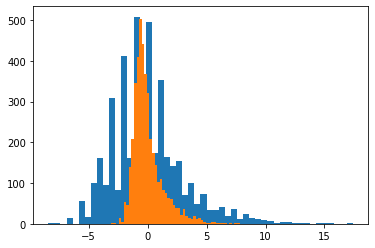

In [35]:
xpoint = matrix1.dot(eigvec.T[0])
ypoint = matrix1.dot(eigvec.T[1])

plt.hist(xpoint, bins=50)
plt.hist(ypoint, bins=50)

(array([  5.,   6.,   1.,   3.,   8.,   7.,  15.,  14.,  35.,  58.,  90.,
         89., 134., 215., 307., 302., 245., 250., 234., 218., 202., 181.,
        185., 163., 179., 169., 145., 133.,  92., 104.,  86.,  52.,  65.,
         33.,  34.,  21.,  12.,  22.,  15.,   8.,  10.,   6.,   9.,   5.,
          1.,   3.,   2.,   2.,   0.,   2.]),
 array([-1.43196912, -1.36161026, -1.29125141, -1.22089256, -1.15053371,
        -1.08017486, -1.00981601, -0.93945716, -0.86909831, -0.79873946,
        -0.7283806 , -0.65802175, -0.5876629 , -0.51730405, -0.4469452 ,
        -0.37658635, -0.3062275 , -0.23586865, -0.1655098 , -0.09515094,
        -0.02479209,  0.04556676,  0.11592561,  0.18628446,  0.25664331,
         0.32700216,  0.39736101,  0.46771987,  0.53807872,  0.60843757,
         0.67879642,  0.74915527,  0.81951412,  0.88987297,  0.96023182,
         1.03059067,  1.10094953,  1.17130838,  1.24166723,  1.31202608,
         1.38238493,  1.45274378,  1.52310263,  1.59346148,  1.66382033,
 

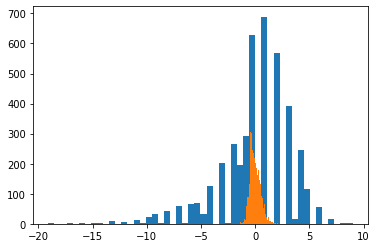

In [46]:
eigval, eigvec = np.linalg.eig(cov1df)
xpoint = matrix1.dot(eigvec.T[0])
ypoint = matrix1.dot(eigvec.T[1])

plt.hist(xpoint, bins=50)
plt.hist(ypoint, bins=50)

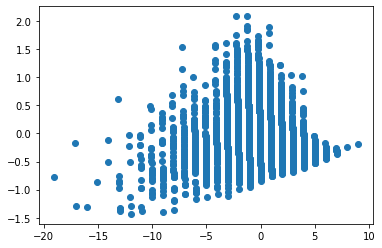

In [47]:
plt.scatter(xpoint, ypoint)

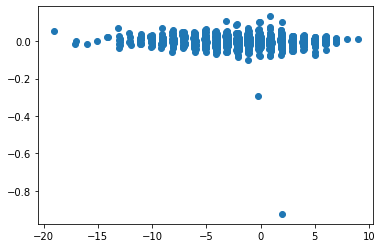

In [65]:
pca = matrix1.dot(eigvec)
plt.scatter(pca.loc[:,0], pca.loc[:,6])

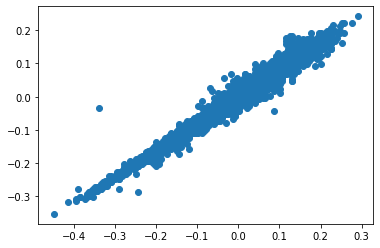

In [70]:
plt.scatter(matrix1.iloc[:,0], matrix1.iloc[:,1])

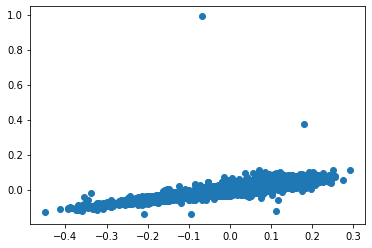

In [71]:
plt.scatter(matrix1.iloc[:,0], matrix1.iloc[:,2])

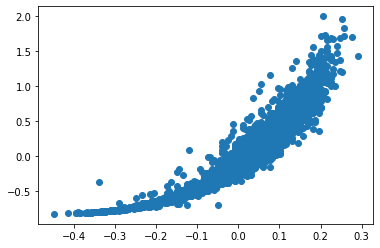

In [72]:
plt.scatter(matrix1.iloc[:,0], matrix1.iloc[:,3])